<h1>CIFAR10 Klassifizierung mit ANN</h1>

In diesem Notebook geht es darum, mit einem ANN (Artificial Neural Net) Klassifizierungen durchzuführen.

Diesmal nutzen wir das CIFAR-10 Dataset, was auch gerne für Tests und Benchmarks verwendet wird. 

- Hier nutzen wir auch das Tensorboard.

> The CIFAR-10 dataset
https://www.cs.toronto.edu/~kriz/cifar.html [Letzter Zugriff: 14.06.2024]
>
> Reference:
Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

- Es gibt auch ein CIFAR100 Dataset, gerne mal ausprobieren!

Das Dataset kann von der Webseite heruntergeladen oder von anderen Quellen beschafft werden. 

Tensorflow bietet viele Datasets direkt wie Sklearn an, die sofort verwendbar sind

In [59]:
# Imports.
import tensorflow as tf
import pandas     as pd
import numpy      as np
import seaborn    as sn

import matplotlib.pyplot as plt

In [35]:
# Lade CIFAR-10 Dataset via Tensorflow.
# - Siehe auch: https://www.tensorflow.org/api_docs/python/tf/keras/datasets
# - Achte auf Reihenfolge. 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data() # oder cifar100, ...

In [36]:
X_train.shape

(50000, 32, 32, 3)

Das ganze Dataset besteht aus 60K Bildern -> 50K für das Training und 10K für das Testen.
- Jedes Bild ist 32 x 32 groß, RGB.

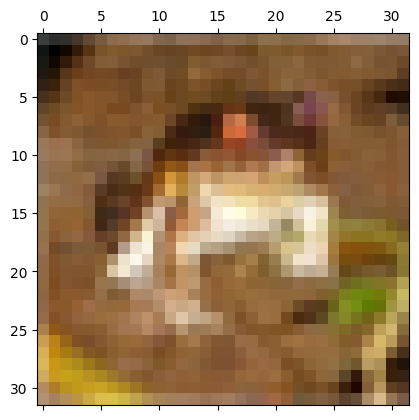

In [37]:
# Zeige ein Element an.
# - Mit plt.grey() in schwarz/weiß
plt.matshow(X_train[0])

In [38]:
# Mit dem Dict können wir dann die Plots einfach beschriften. 
# - Oder andere Lösungen...
name_dict = {
        0:	"airplane",
        1:	"automobile",
        2:	"bird",
        3:	"cat",
        4:	"deer",
        5:   "dog",
        6:	"frog",
        7:	"horse",
        8:	"ship",
        9:	"truck"
}

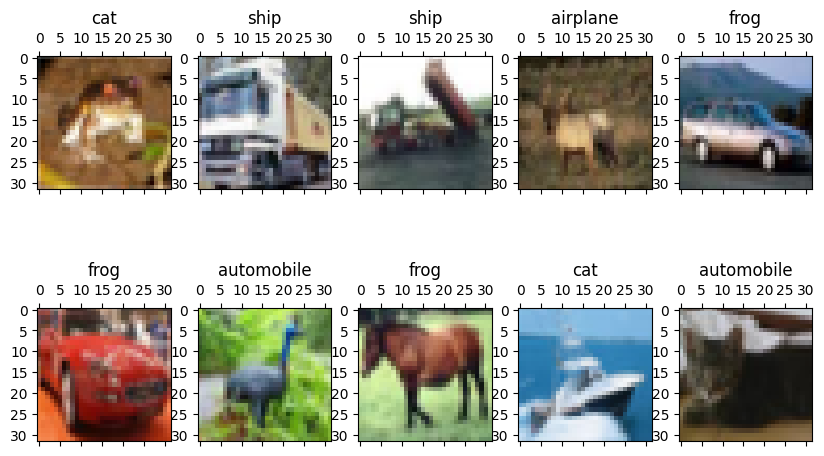

In [39]:
# Zeige mehrere an.
# - So haben wir eine Übersicht.

# Füge optional weitere Inhalte zu.
fig, axs = plt.subplots(2,5, figsize=(10, 6))
axs = axs.ravel()

for i in range(10):
    axs[i].title.set_text( name_dict[ int(y_test[i]) ])
    axs[i].matshow(X_train[i])

Danach können die Bilder skaliert werden, dafür dividieren wir durch 255 (RGB).

In [53]:
# Normalisiere. 
X_train_scaled = X_train / 255
X_test_scaled =  X_test / 255

Die Y-Werte sind diskrete Werte, hier testen und verwenden wir On-Hot-Encode. <br>
Bei diesem Encoding, was mit Tensorflow durchgeführt wird, entstehen am Ende Arrays, deren Index die Klasse angibt.

In [54]:
y_train_cat = tf.keras.utils.to_categorical( y_train, num_classes=10, dtype='float32')
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
# Klasse 6 codiert.
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [56]:
y_train[0]

array([6], dtype=uint8)

In [63]:
y_test_cat = tf.keras.utils.to_categorical( y_test, num_classes=10, dtype='float32')
y_test_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [71]:
# Erstelle Model.
# - Alles was vom Model extra gemacht wird, kann sich auf die Leistung auswirken.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),             # Netz soll Bild Flattern.
    tf.keras.layers.Dense(units=500,  activation='relu'),
    tf.keras.layers.Dense(units=500,  activation='relu'),
    tf.keras.layers.Dense(units=500,  activation='leaky_relu'),
    tf.keras.layers.Dense(units=10,    activation='softmax'),
    
])

# Tracken der Events.
# - Auch PyTorch kann Tensorboard nutzen. 
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/cifar10ann/SGD", histogram_freq=1)

model.compile(
    optimizer  = 'SGD',
    loss       = 'categorical_crossentropy',
    metrics    = ['accuracy']
)

In [72]:
model.fit(X_train_scaled, y_train_cat, epochs=3, call)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8658 - accuracy: 0.3301
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6702 - accuracy: 0.4037
Epoch 3/3
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5877 - accuracy: 0.4352


In [64]:
# Evaluiere das Model.
model.evaluate(X_test_scaled, y_test_cat)

313/313 [==============================] - 2s 5ms/step - loss: 1.4076 - accuracy: 0.5081


[1.4075627326965332, 0.5080999732017517]

Um die Klasse mit dem höchsten Score zu bekommen, können wir das Array mit Numpy filtern. 

In [74]:
np.argmax([.9, .3, .4, .6])

0

In [66]:
# Array mit zutreffenden Klassen, aus dem Array der Prediction. 
# - Index = Klasse
target_predicted = [np.argmax(i) for i in model.predict(X_test_scaled) ]

313/313 [==============================] - 2s 6ms/step


In [67]:
# Mit TF kann direkt die Beschriftung mit angegeben werden.
tf.math.confusion_matrix(labels=y_test, predictions=target_predicted)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[368,  97,  84,  12,  15,  17,  33, 167, 113,  94],
       [  4, 741,   5,   4,   2,   8,  23,  52,  28, 133],
       [ 21,  32, 295,  35,  52,  89, 195, 249,  12,  20],
       [  5,  32,  38, 179,  15, 222, 207, 222,  18,  62],
       [ 20,  15,  83,  19, 248,  42, 228, 303,  18,  24],
       [  5,  16,  32,  81,  26, 438, 104, 250,  20,  28],
       [  2,  11,  21,  19,  24,  40, 769,  80,   7,  27],
       [  6,  24,  12,  11,  17,  40,  26, 827,   4,  33],
       [ 35, 128,  15,   9,   6,  15,  17,  78, 600,  97],
       [  8, 208,   3,   9,   0,  22,  20,  96,  18, 616]])>

Text(95.72222222222221, 0.5, 'Truth')

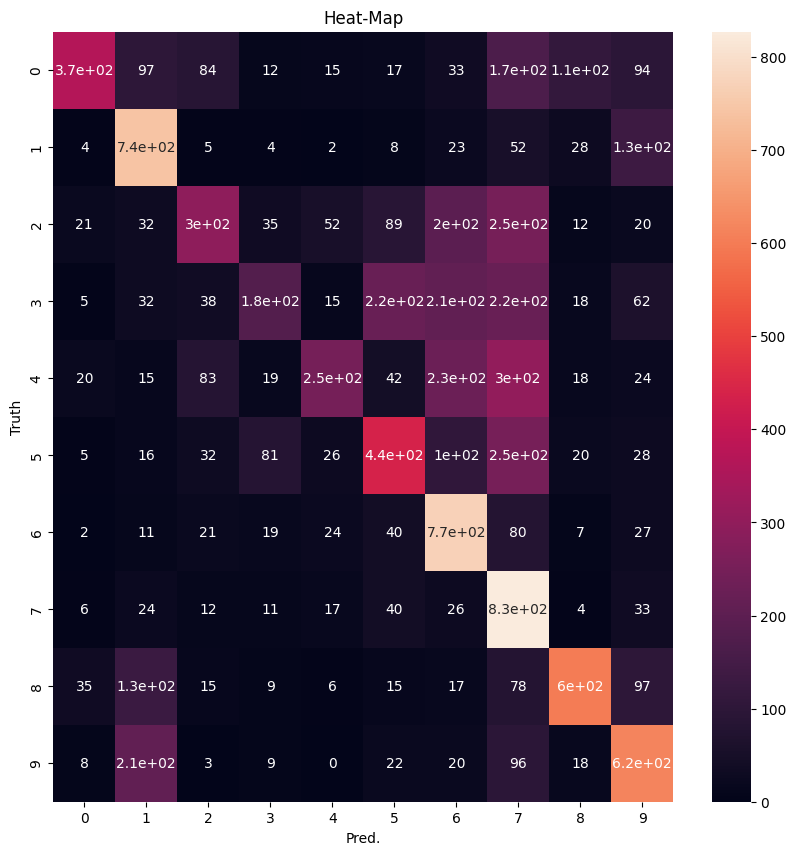

In [68]:
# Mit Matplotlib und Seaborn visualisieren.
heatmap = tf.math.confusion_matrix(labels=y_test, predictions=target_predicted)
plt.figure(figsize=(10, 10))
sn.heatmap(heatmap, annot=True)
plt.title("Heat-Map")
plt.xlabel("Pred.")
plt.ylabel("Truth")